In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold

from skimage.io import imread, imshow, show, imshow_collection
from skimage.transform import resize, rescale, rotate

warnings.filterwarnings('ignore')

SAVE_MODELS = False

# Load Data

In [2]:
data_train_1 = pickle.load(open("data/data_train_flatten_batch_1.pkl", "rb"))
data_train_2 = pickle.load(open("data/data_train_flatten_batch_2.pkl", "rb"))
labels_train_1 = pickle.load(open("data/labels_train_batch_1.pkl", "rb"))
labels_train_2 = pickle.load(open("data/labels_train_batch_2.pkl", "rb"))

data_train = np.concatenate((data_train_1, data_train_2))
labels_train = np.concatenate((labels_train_1, labels_train_2))

data_test = pickle.load(open("data/data_test_flatten.pkl", "rb"))
labels_test = pickle.load(open("data/labels_test.pkl", "rb"))

# Shuffle train set
data_train, labels_train = shuffle(data_train, labels_train, random_state=25)

# Scale Data

In [3]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(data_train)
X_test_std = scaler.transform(data_test)

# Train Model

In [4]:
# Create custom scorer for tuning
def f1_global(y_true, y_pred):
    precision_macro = precision_score(y_true, y_pred, average="macro")
    recall_macro = recall_score(y_true, y_pred, average="macro")
    return (2 * precision_macro * recall_macro) / (precision_macro + recall_macro)

f1_global_scorer = make_scorer(f1_global, greater_is_better=True)


m = KNeighborsClassifier(n_jobs=-1)

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(m, parameters, verbose=3, scoring=f1_global_scorer)
grid_search.fit(X_train_std, labels_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.366 total time=  25.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.370 total time=  27.1s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.371 total time=  25.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.356 total time=  26.6s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.375 total time=  25.6s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.370 total time=  24.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.374 total time=  26.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.384 total time=  26.4s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.366 total time=  25.6s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.383 total time=  25.5s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.370 total time=  28.2s
[CV 2/5] END ....n_neighbors=4, weights=uniform

[CV 2/5] END ...n_neighbors=13, weights=uniform;, score=0.387 total time=  25.5s
[CV 3/5] END ...n_neighbors=13, weights=uniform;, score=0.382 total time=  26.5s
[CV 4/5] END ...n_neighbors=13, weights=uniform;, score=0.372 total time=  26.1s
[CV 5/5] END ...n_neighbors=13, weights=uniform;, score=0.387 total time=  25.7s
[CV 1/5] END ..n_neighbors=13, weights=distance;, score=0.385 total time=  27.8s
[CV 2/5] END ..n_neighbors=13, weights=distance;, score=0.395 total time=  25.7s
[CV 3/5] END ..n_neighbors=13, weights=distance;, score=0.391 total time=  27.2s
[CV 4/5] END ..n_neighbors=13, weights=distance;, score=0.380 total time=  26.5s
[CV 5/5] END ..n_neighbors=13, weights=distance;, score=0.392 total time=  26.3s
[CV 1/5] END ...n_neighbors=14, weights=uniform;, score=0.377 total time=  27.0s
[CV 2/5] END ...n_neighbors=14, weights=uniform;, score=0.384 total time=  26.2s
[CV 3/5] END ...n_neighbors=14, weights=uniform;, score=0.384 total time=  27.1s
[CV 4/5] END ...n_neighbors=

[CV 4/5] END ...n_neighbors=23, weights=uniform;, score=0.369 total time=  26.8s
[CV 5/5] END ...n_neighbors=23, weights=uniform;, score=0.381 total time=  25.6s
[CV 1/5] END ..n_neighbors=23, weights=distance;, score=0.383 total time=  27.5s
[CV 2/5] END ..n_neighbors=23, weights=distance;, score=0.384 total time=  25.7s
[CV 3/5] END ..n_neighbors=23, weights=distance;, score=0.387 total time=  27.0s
[CV 4/5] END ..n_neighbors=23, weights=distance;, score=0.374 total time=  26.0s
[CV 5/5] END ..n_neighbors=23, weights=distance;, score=0.391 total time=  25.7s
[CV 1/5] END ...n_neighbors=24, weights=uniform;, score=0.373 total time=  24.8s
[CV 2/5] END ...n_neighbors=24, weights=uniform;, score=0.380 total time=  29.0s
[CV 3/5] END ...n_neighbors=24, weights=uniform;, score=0.381 total time=  26.8s
[CV 4/5] END ...n_neighbors=24, weights=uniform;, score=0.371 total time=  25.6s
[CV 5/5] END ...n_neighbors=24, weights=uniform;, score=0.377 total time=  24.4s
[CV 1/5] END ..n_neighbors=2

In [5]:
print("Model optimal parameters".upper())
print("n_neighbors:", model.get_params()["n_neighbors"])
print("weights:", model.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 8
weights: distance


# Test Model

In [6]:
predictions = model.predict(X_test_std)

accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, average="macro")
recall = recall_score(labels_test, predictions, average="macro")
f1_macro = f1_score(labels_test, predictions, average="macro")
f1_glob = (2 * precision * recall) / (precision + recall)

print("Accuracy score: {:.4f}%\nPrecision macro: {:.4f}%\nRecall macro: {:.4f}%".format(accuracy*100,precision*100,recall*100))
print("F1 macro: {:.4f}%\nF1 global: {:.4f}%".format(f1_macro*100, f1_glob*100))

Accuracy score: 35.4700%
Precision macro: 45.5384%
Recall macro: 35.4700%
F1 macro: 34.2898%
F1 global: 39.8785%


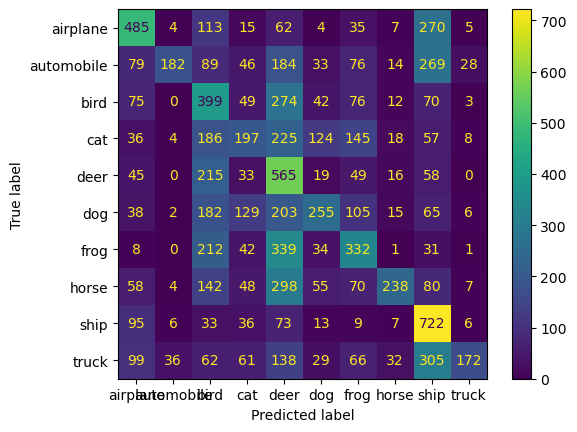

In [7]:
cm = confusion_matrix(labels_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Save Model

In [8]:
if SAVE_MODELS:
    model_file_name = "knn.pkl"
    pickle.dump(model, open(model_file_name, "wb"))

# Black And White

## Load data

In [9]:
train_batches = []
labels_batches = []

for i in [1, 2, 3, 4, 5]:
    data_filepath = "data/data_train_bw_flatten_batch_" + str(i) + ".pkl"
    labels_filepath = "data/labels_train_bw_batch_" + str(i) + ".pkl"
    train_batches.append(pickle.load(open(data_filepath, "rb")))
    labels_batches.append(pickle.load(open(labels_filepath, "rb")))
    
data_train_bw = np.concatenate(train_batches)
labels_train_bw = np.concatenate(labels_batches)

data_test_bw = pickle.load(open("data/data_test_bw_flatten.pkl", "rb"))
labels_test_bw = pickle.load(open("data/labels_test_bw.pkl", "rb"))

# Shuffle train set
data_train_bw, labels_train_bw = shuffle(data_train_bw, labels_train_bw, random_state=25)

## Scale data

In [10]:
scaler = StandardScaler()

X_train_std_bw = scaler.fit_transform(data_train_bw)
X_test_std_bw = scaler.transform(data_test_bw)

## Train model

In [11]:
m = KNeighborsClassifier(n_jobs=-1)

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(m, parameters, verbose=3, scoring=f1_global_scorer)
grid_search.fit(X_train_std_bw, labels_train_bw)
model_bw = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.319 total time=  13.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.324 total time=  13.6s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.332 total time=  13.8s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.312 total time=  13.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.334 total time=  14.4s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.330 total time=  13.8s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.334 total time=  14.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.337 total time=  14.3s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.320 total time=  14.3s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.345 total time=  13.6s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.325 total time=  15.9s
[CV 2/5] END ....n_neighbors=4, weights=uniform

[CV 2/5] END ...n_neighbors=13, weights=uniform;, score=0.338 total time=  15.0s
[CV 3/5] END ...n_neighbors=13, weights=uniform;, score=0.337 total time=  15.2s
[CV 4/5] END ...n_neighbors=13, weights=uniform;, score=0.328 total time=  14.7s
[CV 5/5] END ...n_neighbors=13, weights=uniform;, score=0.341 total time=  15.2s
[CV 1/5] END ..n_neighbors=13, weights=distance;, score=0.345 total time=  15.5s
[CV 2/5] END ..n_neighbors=13, weights=distance;, score=0.348 total time=  15.2s
[CV 3/5] END ..n_neighbors=13, weights=distance;, score=0.349 total time=  15.0s
[CV 4/5] END ..n_neighbors=13, weights=distance;, score=0.337 total time=  15.0s
[CV 5/5] END ..n_neighbors=13, weights=distance;, score=0.351 total time=  15.0s
[CV 1/5] END ...n_neighbors=14, weights=uniform;, score=0.337 total time=  15.6s
[CV 2/5] END ...n_neighbors=14, weights=uniform;, score=0.340 total time=  15.3s
[CV 3/5] END ...n_neighbors=14, weights=uniform;, score=0.337 total time=  15.1s
[CV 4/5] END ...n_neighbors=

[CV 4/5] END ...n_neighbors=23, weights=uniform;, score=0.331 total time=  15.0s
[CV 5/5] END ...n_neighbors=23, weights=uniform;, score=0.340 total time=  14.8s
[CV 1/5] END ..n_neighbors=23, weights=distance;, score=0.340 total time=  15.3s
[CV 2/5] END ..n_neighbors=23, weights=distance;, score=0.346 total time=  14.7s
[CV 3/5] END ..n_neighbors=23, weights=distance;, score=0.343 total time=  15.2s
[CV 4/5] END ..n_neighbors=23, weights=distance;, score=0.335 total time=  14.6s
[CV 5/5] END ..n_neighbors=23, weights=distance;, score=0.350 total time=  14.8s
[CV 1/5] END ...n_neighbors=24, weights=uniform;, score=0.334 total time=  15.3s
[CV 2/5] END ...n_neighbors=24, weights=uniform;, score=0.340 total time=  14.8s
[CV 3/5] END ...n_neighbors=24, weights=uniform;, score=0.339 total time=  14.8s
[CV 4/5] END ...n_neighbors=24, weights=uniform;, score=0.327 total time=  14.5s
[CV 5/5] END ...n_neighbors=24, weights=uniform;, score=0.340 total time=  14.5s
[CV 1/5] END ..n_neighbors=2

In [12]:
print("Model optimal parameters".upper())
print("n_neighbors:", model_bw.get_params()["n_neighbors"])
print("weights:", model_bw.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 11
weights: distance


## Test model

In [13]:
predictions_bw = model_bw.predict(X_test_std_bw)

accuracy_bw = accuracy_score(labels_test_bw, predictions_bw)
precision_bw = precision_score(labels_test_bw, predictions_bw, average="macro")
recall_bw = recall_score(labels_test_bw, predictions_bw, average="macro")
f1_macro_bw = f1_score(labels_test_bw, predictions_bw, average="macro")
f1_glob_bw = (2 * precision_bw * recall_bw) / (precision_bw + recall_bw)

print("Accuracy score: {:.4f}%\nPrecision macro: {:.4f}%\nRecall macro: {:.4f}%".format(accuracy_bw*100,precision_bw*100,recall_bw*100))
print("F1 macro: {:.4f}%\nF1 global: {:.4f}".format(f1_macro_bw*100, f1_glob_bw*100))

Accuracy score: 30.8400%
Precision macro: 42.2896%
Recall macro: 30.8400%
F1 macro: 29.4861%
F1 global: 35.6685


[]

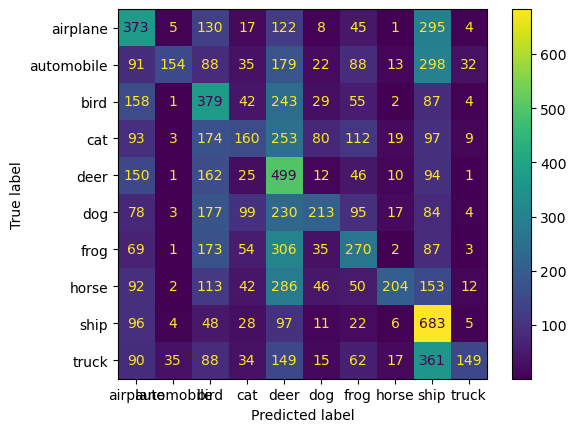

In [14]:
cm = confusion_matrix(labels_test_bw, predictions_bw, labels=model_bw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bw.classes_)
disp.plot()
plt.plot()

## Save model

In [15]:
if SAVE_MODELS:
    model_file_name_bw = "knn_bw.pkl"
    pickle.dump(model_bw, open(model_file_name_bw, "wb"))